<a href="https://colab.research.google.com/github/ojonugwa485/AI/blob/main/Predicting_House_Values_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression R²: 0.5353753579552387
Linear Regression MSE: 6353825977.615272
MLP Regressor R²: 0.588222651597675
MLP Regressor MSE: 5631129683.001555


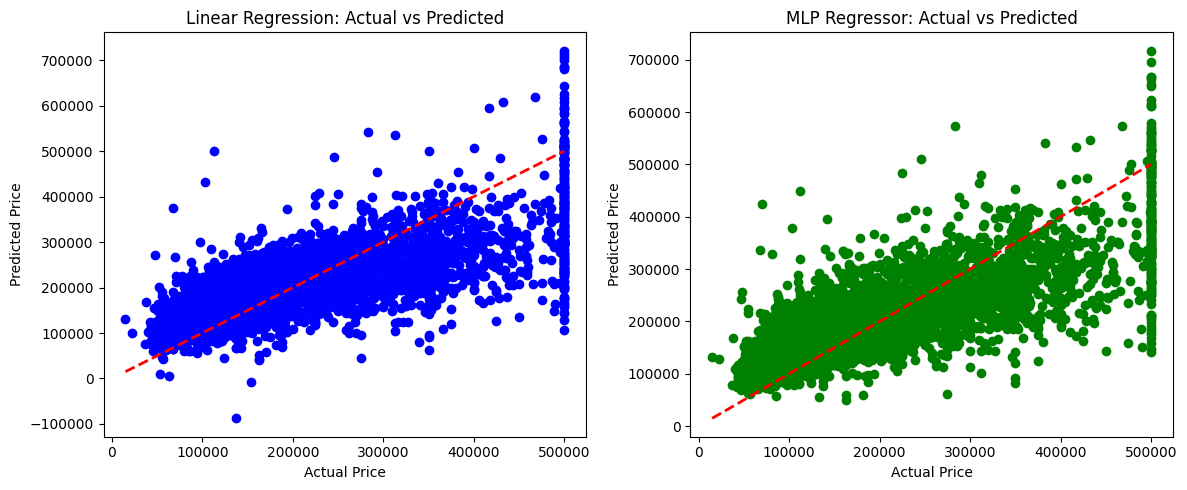

In [7]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import requests
import os

# 1. Load Kaggle Housing Dataset (make sure Housing.csv is in the same folder)
# Check if the file exists, if not, download it
file_path = "housing.csv" # Corrected filename
if not os.path.exists(file_path):
    # print(f"Downloading {file_path}...") # Removed print statement
    url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
    r = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(r.content)
    # print("Download complete.") # Removed print statement

data = pd.read_csv(file_path)

# 2. Preprocess Data
# Select features (X) and target (y)
X = data[["total_rooms", "total_bedrooms", "population", "households", "median_income"]] # Corrected column names
y = data["median_house_value"] # Corrected target variable

# Handle missing values by dropping rows with NaN
data.dropna(subset=X.columns, inplace=True)
X = data[["total_rooms", "total_bedrooms", "population", "households", "median_income"]] # Re-select X after dropping rows
y = data["median_house_value"] # Re-select y after dropping rows


# 3. Split Data into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 5. Train Neural Network (MLP Regressor)
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# 6. Evaluate Performance
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))

print("MLP Regressor R²:", r2_score(y_test, y_pred_mlp))
print("MLP Regressor MSE:", mean_squared_error(y_test, y_pred_mlp))

# 7. Visualization: Actual vs Predicted
plt.figure(figsize=(12, 5))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")

# MLP Regressor Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_mlp, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MLP Regressor: Actual vs Predicted")

plt.tight_layout()
plt.show()